In [2]:
# 1) exercise 1.5 - learning vs design
#
#      a) Determining the age at which a particular medical test should be performed - learning
#      b) Classifying numbers into primes and non-primes - design
#      c) Detecting potential fraud in credit card charges - learning
#      d) Determining the time it would take a falling object to hit the ground - design
#      e) Determining the optimal cycle for traffic lights in a busy intersection - learning 

In [ ]:
# 2) exercise 1.8

# If μ=0.9, what is the probability that a sample of 10 marbles will have ν≤0.1?
# [Hints: 1. Use binomial distribution. 2. The answer is a very small number.]

# μ=P(RedMarbles) = 0.9

# P(RedMarbles ≤ 1 | Marbles = 10) = P(RedMarbles = 0 | Marbles = 10) + P(RedMarbles = 1 | Marbles = 10)
# P(RedMarbles = 0 | Marbles = 10) = 0.1^10
# P(RedMarbles = 1 | Marbles = 10) = C(1 10) × 0.9 × 0.1^9

# ν = P(RedMarbles ≤ 0.1 | Marbles = 10)
# v = P(RedMarbles = 0 | Marbles = 10) + P(RedMarbles = 1 | Marbles = 10)
# v = 0.1^10 + C(1 10) × 0.9 × 0.1^9
# v = 0.1^9 × (0.1+9)
# v = 9.1×10^−9

In [ ]:
# 3) exercise 1.9
# If μ=0.9, use the Hoeffding Inequality to bound the probability that a sample of 10 marbles will have ν≤0.1
# compare the answer to the previous exercise.


# ν≤0.1
# μ=0.9
# |ν−μ| ≥ 0.8
# ϵ = 0.7 

# P[|ν−μ| > ϵ] ≤ 2e^(−2ϵ^(2N)) = 2e^(−2 × 0.7^(2 × 10)) ≈ 1.109032 x 10^-4

In [ ]:
# 4)  In this problem you’ll generate a syntehetic/artificial data set in order to study the perceptron learning algorithm.  
#     The data is two dimensional, where the range of x1 and x2 is between −1 and +1.
# 
#       (a) Define a target function as a straight line passing through the origin and having a random slope. 
#           One way to generate a random slope is to randomly choose a number between 0 and π and compute its tangent.
#       (b) Generate 20 points in the plane limited to the ranges given above (between −1 and 1).
#           The points have two coordinates so you need to independently generate 20 random numbers for each of the two coordinates, x1 and x2. 
#           For example, generate an array of 20 random numbers for x1 and then another for x2 and then bring the two together as two columns of a matrix. 
#           That would have a usual table form of the data – each row one point, and each column one feature.
#       (c) Label the points so that your target function separates them perfectly. Use +1 and −1 for the labels. Make the labels the third column in your data set.
#           Now you have a complete data set ready for supervised learning.
#       (d) Provide a plot of the target function and the properly labelled points as classified by the target function.
#           For example, you may use ‘+’ and ‘o’ to label ‘positive’ and ‘negative’ points as decided by the target function.
#           You also may want to use colors for better clarity, for example, negative points would be red and positive points blue.
#       (e) Implement the PLA algorithm and run it on your data set. Report the number of iterations it took to produce the final hypothesis.
#           Plot the resut – the target function, final hypothesis and data points. Embelish/mark your plot so it’s clear what it shows.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns
from sklearn.linear_model import Perceptron
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [6]:
np.random.seed(2018230089)
x1 = np.random.uniform(-1,1)
x2 = np.random.uniform(-1,1)
d = [x1,x2]
d

[-0.5858580654492067, -0.3387452236432451]

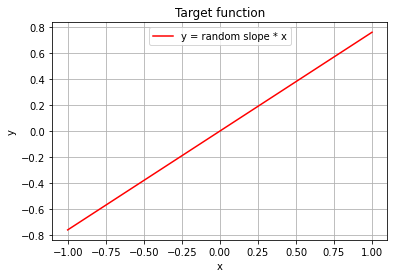

In [20]:
# a) 

np.random.seed(2018230089)
rs = np.random.uniform(0,math.pi)
randomslope = math.tan(rs)
x = np.linspace(-1,1,20)
y = randomslope*x

plt.plot(x, y, '-r', label='y = random slope * x')
plt.title('Target function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper center')
plt.grid()
plt.show()

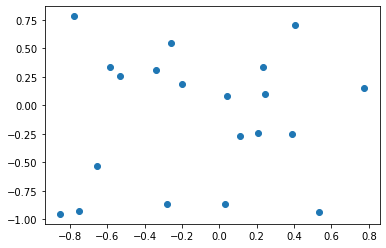

In [23]:
# b)

np.random.seed(2018230089)
x1 = np.random.uniform(-1,1,(20,1))
x2 = np.random.uniform(-1,1,(20,1))
data = pd.DataFrame(columns=['x1', 'x2'], data= np.hstack([x1, x2]))
plt.scatter(x1, x2)

In [25]:
#c)

labels = []
for index, row in data.iterrows():
   print(row['x1'], row['x2'])

-0.5858580654492067 0.33357511526701367
-0.3387452236432451 0.3108791908025579
-0.19693355968425008 0.18779801668399232
-0.7497030855344926 -0.9306856423386836
-0.8520605180306939 -0.9530809018334283
-0.25940482902657425 0.5472275940338469
-0.6564716786287552 -0.5359826776703827
-0.28144622826625754 -0.8641587866899125
-0.533420071813349 0.260567763295515
0.032569270340184975 -0.8633316649624554
0.2459303561120989 0.10057624576845936
0.20860795452211311 -0.23948698584659533
0.4043115183386299 0.7016068816724528
0.3905413566740694 -0.25506513937276365
-0.7790319662861043 0.7821834292177683
0.5339562699959579 -0.9369316147001712
0.0391980901754585 0.0786191383740702
0.7767097899767672 0.149038012608377
0.2362021344885219 0.34041789808246325
0.11192427557265416 -0.2676988076860678


In [26]:
labels = []
for index, row in data.iterrows():
   if  row['x2'] - ( randomslope * row['x1']) < 0 :
     labels.append(-1)
   else :
     labels.append(1)
labels

[1, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1]

In [28]:
a = [labels]
label = np.array(a)
data1 = pd.DataFrame(columns=['x1', 'x2', 'labels'], data= np.hstack([data,label.T]))
data1

,x1,x2,labels
0,-0.585858,0.333575,1.0
1,-0.338745,0.310879,1.0
2,-0.196934,0.187798,1.0
3,-0.749703,-0.930686,-1.0
4,-0.852061,-0.953081,-1.0
5,-0.259405,0.547228,1.0
6,-0.656472,-0.535983,-1.0
7,-0.281446,-0.864159,-1.0
8,-0.533420,0.260568,1.0
9,0.032569,-0.863332,-1.0


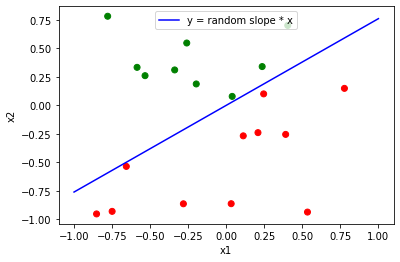

In [42]:
# d)

colors = {-1:'red', 1:'green'}
plt.scatter(x1, x2, c=data1['labels'].map(colors))
plt.plot(x, y, '-r', color= 'blue', label='y = random slope * x')
plt.legend(loc='upper center')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [35]:
# e)

PLA = Perceptron(tol=1e-3, random_state=0)
PLA.fit(data, data1['labels'])
PLA.score(data, data1['labels'])

1.0

In [36]:
print('The number of iterations it took to produce the final hypothesis is:')
PLA.n_iter_

The number of iterations it took to produce the final hypothesis is:


9

In [38]:
PLA.coef_

array([[-0.83664942,  1.3350295 ]])

In [37]:
PLA.intercept_

array([0.])

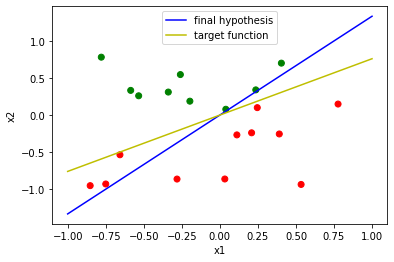

In [43]:
x = np.linspace(-1,1,20)
h = 1.3350295*x
plt.plot(x, h, '-b', label ='final hypothesis') 

colors = {-1:'red', 1:'green'}  
plt.scatter(x1, x2, c=data1['labels'].map(colors))
plt.plot(x, y, '-y', label='target function') 
plt.legend(loc='upper center')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()